In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_8 = pd.read_csv('../data/repositories.csv')
fuente_8 = "https://github.com/github/innovationgraph/tree/main"


Muestra mediante un head() los principales datasets con los que vas a trabajar

In [5]:
df_8.head()

,repositories,iso2_code,year,quarter
0,30669781,US,2020,1
1,20179087,CN,2020,1
2,17912888,EU,2020,1
3,9254535,IN,2020,1
4,4171705,GB,2020,1


In [6]:
df_8_M = df_8[df_8["iso2_code"] != "EU"]

In [7]:
df_8_M

,repositories,iso2_code,year,quarter
0,30669781,US,2020,1
1,20179087,CN,2020,1
3,9254535,IN,2020,1
4,4171705,GB,2020,1
5,3602025,BR,2020,1
...,...,...,...,...
4245,141,SH,2024,3
4246,128,CK,2024,3
4247,115,KI,2024,3
4248,104,MS,2024,3


In [8]:
repositories_M = df_8_M.groupby(['year', "quarter"])['repositories'].sum().reset_index()

In [9]:
repositories_M

,year,quarter,repositories
0,2020,1,122435835
1,2020,2,131344838
2,2020,3,139783519
3,2020,4,148841391
4,2021,1,158145816
5,2021,2,168292701
6,2021,3,178669508
7,2021,4,189422371
8,2022,1,201630254
9,2022,2,213352044


In [10]:
repositories_M["year_quarter"] = repositories_M["year"].astype("str") +"-Q"+  repositories_M ["quarter"].astype("str")
repositories_M

,year,quarter,repositories,year_quarter
0,2020,1,122435835,2020-Q1
1,2020,2,131344838,2020-Q2
2,2020,3,139783519,2020-Q3
3,2020,4,148841391,2020-Q4
4,2021,1,158145816,2021-Q1
5,2021,2,168292701,2021-Q2
6,2021,3,178669508,2021-Q3
7,2021,4,189422371,2021-Q4
8,2022,1,201630254,2022-Q1
9,2022,2,213352044,2022-Q2


In [11]:
from matplotlib.ticker import FuncFormatter

C:\Users\guill\AppData\Local\Temp\ipykernel_18480\4052430310.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= repositories_M, x = "year_quarter", y = "repositories", palette="Blues")


Text(0.5, 0, 'Año-Trimestre')

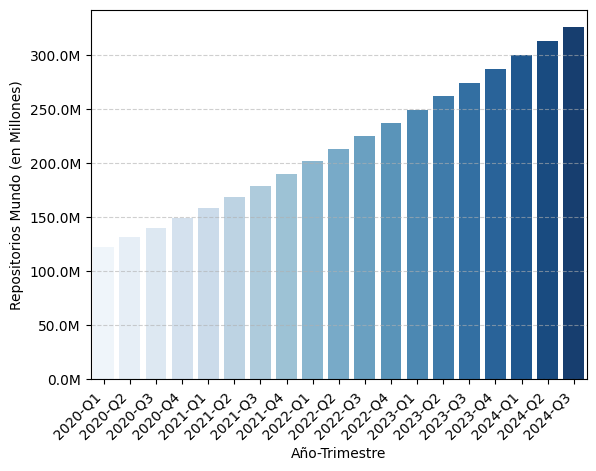

In [14]:
sns.barplot(data= repositories_M, x = "year_quarter", y = "repositories", palette="Blues")
plt.xticks(repositories_M["year_quarter"].unique(),rotation=45, ha="right");
# Formatter function to display y-axis labels in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Multiply by 1e-6 to convert to millions

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
# Añadir solo líneas horizontales
plt.grid(True, axis='y', linestyle='--', alpha=0.6)  # Solo líneas horizontales
# Set the y-axis label
plt.ylabel('Repositorios Mundo (en Millones)')
plt.xlabel('Año-Trimestre')

In [16]:

# Group by the year and sum developers (or aggregate as needed)
repositories_per_year_M = repositories_M.groupby('year')['repositories'].sum().reset_index()

# Calculate the Year-over-Year percentage change
repositories_per_year_M['YoY_change'] = repositories_per_year_M['repositories'].pct_change() * 100

In [17]:
repositories_per_year_M

,year,repositories,YoY_change
0,2020,542405583,NaN
1,2021,694530396,28.046321
2,2022,876967192,26.267647
3,2023,1071993578,22.238732
4,2024,938173473,-12.483294


In [18]:
repositories_per_year_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5 non-null      int64  
 1   repositories  5 non-null      int64  
 2   YoY_change    4 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 252.0 bytes


In [22]:
media_aprox_repositories = (repositories_per_year_M.iloc[1]['YoY_change']+repositories_per_year_M.iloc[2]['YoY_change']+repositories_per_year_M.iloc[3]['YoY_change'])/3

In [23]:
media_aprox_repositories

np.float64(25.517567043726235)